#D7047E - Lab 0 - Pratical task 0.1 - Group 25 (G25) - 2025-03-30
Group 25 (lab 0 mandatory): Tom Andersson

Group 25 (lab 0 non-mandatory): Antonino Davolos, Christos Michail, Felix Hessinger, Sandra Sandström

In [15]:
# Loading images from Pytorch

import torch
import torchvision
import torchvision.transforms as transforms

# Define the transformations (convert the images to tensor and normalize them)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Download the CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for training data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Download the CIFAR-10 test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for test data
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False)

# Define the class labels for CIFAR-10 dataset
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Example: Getting a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Print the shape of images and labels
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")


Images batch shape: torch.Size([16, 3, 32, 32])
Labels batch shape: torch.Size([16])


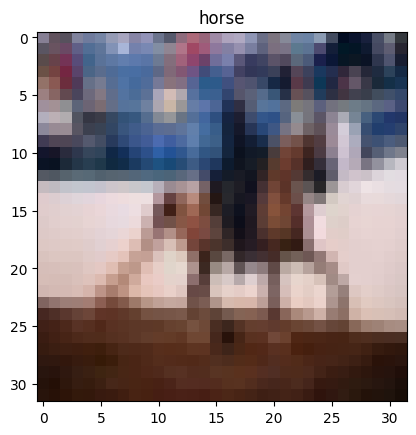

In [16]:
# Plotting image with class title

import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize the image
def imshow(img, title = None):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert tensor to numpy array for display
    if title:
        plt.title(title)  # Add title
    plt.show()

# Get a random batch of images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show the first image in the batch
imshow(images[0], title=classes[labels[0].item()])

In [17]:
# Training and evaluating a Pytorch image classification model (SGD optimizer)
# Learning rate set to 0.01 (0.001 and 0.0001 too slow)

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.leaky_relu = nn.LeakyReLU(0.1)

    def forward(self, x):
        x = self.pool(self.leaky_relu(self.conv1(x)))
        x = self.pool(self.leaky_relu(self.conv2(x)))
        x = self.pool(self.leaky_relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

# Evaluate on the test set
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Epoch 1, Loss: 2.0390
Epoch 2, Loss: 1.5006
Epoch 3, Loss: 1.2770
Epoch 4, Loss: 1.0972
Epoch 5, Loss: 0.9522
Epoch 6, Loss: 0.8380
Epoch 7, Loss: 0.7425
Epoch 8, Loss: 0.6572
Epoch 9, Loss: 0.5832
Epoch 10, Loss: 0.5173
Test Accuracy: 75.07%


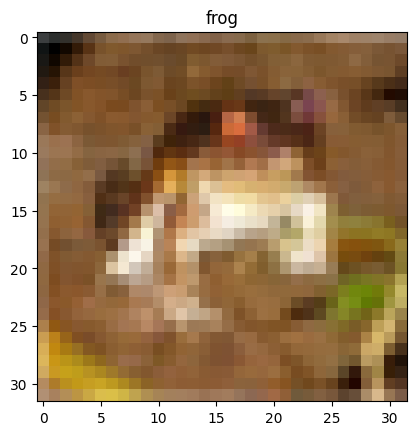

In [18]:
# Loading images from Keras

import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to the range [0, 1] by dividing by 255
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class labels for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Example: Display the first image in the training dataset
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0][0]])
plt.show()



In [26]:
# Training and evaluating a Keras image classification model (SGD optimizer)
# Learning rate set to 0.01 (0.001 and 0.0001 too slow)

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.optimizers import SGD

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential()

# Define the input layer separately
model.add(layers.InputLayer(shape=(32, 32, 3)))

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), padding='same'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected (Dense) Layer 1
model.add(layers.Dense(256))
model.add(layers.LeakyReLU(alpha=0.1))

# Fully connected (Dense) Layer 2
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=0.1))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with SGD optimizer and a learning rate of 0.01
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.2321 - loss: 2.0746 - val_accuracy: 0.4598 - val_loss: 1.5155
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4728 - loss: 1.4690 - val_accuracy: 0.5463 - val_loss: 1.2988
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5665 - loss: 1.2241 - val_accuracy: 0.5964 - val_loss: 1.1381
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6295 - loss: 1.0493 - val_accuracy: 0.6472 - val_loss: 1.0007
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6803 - loss: 0.9128 - val_accuracy: 0.6690 - val_loss: 0.9280
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7113 - loss: 0.8172 - val_accuracy: 0.6821 - val_loss: 0.9050
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7416 - loss: 0.7283 - val_accuracy: 0.7093 - val_loss: 0.8378
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7720 - loss: 0

In [27]:
# Training and evaluating a Keras image classification model (Adam optimizer)

from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential()

# Define the input layer separately
model.add(layers.InputLayer(shape=(32, 32, 3)))

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), padding='same'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected (Dense) Layer 1
model.add(layers.Dense(256))
model.add(layers.LeakyReLU(alpha=0.1))

# Fully connected (Dense) Layer 2
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=0.1))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with Adam optimizer and a learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.4230 - loss: 1.5711 - val_accuracy: 0.6572 - val_loss: 0.9653
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.6986 - loss: 0.8596 - val_accuracy: 0.7085 - val_loss: 0.8443
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7717 - loss: 0.6518 - val_accuracy: 0.7188 - val_loss: 0.8065
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8194 - loss: 0.5095 - val_accuracy: 0.7351 - val_loss: 0.7888
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8569 - loss: 0.4016 - val_accuracy: 0.7459 - val_loss: 0.8506
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8894 - loss: 0.3115 - val_accuracy: 0.7269 - val_loss: 0.9244
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9095 - loss: 0.2571 - val_accuracy: 0.7407 - val_loss: 1.0060
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9254 - loss: 0